# ANÁLISIS DE LA RENTABILIDAD Y RIESGO DE UNA CARTERA DE DOS ACTIVOS

En el mundo de las finanzas, la rentabilidad de una cartera y su variación en función del coeficiente de correlación entre activos son temas esenciales.

En este caso, por simplicidad, nos centraremos en carteras compuestas por dos activos.

Los tres casos que estudiaremos:

* Cuando $ \rho_{12} = 1$, lo que implica una correlación positiva perfecta.

* Cuando $ \rho_{12} = -1$, lo que implica una correlación negativa perfecta.

* Cuando $ -1 \leq \rho_{12} \leq 1$, lo que implica una correlación parcial que puede variar en fuerza.

 También discutiremos la cartera de mínima varianza y la importancia de la diversificación en la gestión de riesgos.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

plt.style.use('ggplot')


Definimos dos funciones:

* **calc_ret_cartera** una función que, dada una cartera, nos devuelve la rentabilidad esperada

* **calc_var_cartera** una función que, dada una cartera, nos devuelve la varianza de la cartera

* una cartera ejemplo con dos activos: **cartera**

In [3]:
def calc_ret_cartera(w1, w2, r1, r2):
    return w1 * r1 + w2 * r2

In [4]:
def calc_std_cartera(w1, w2, std1, std2, rho):
    return np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * std1 * std2 * rho)

In [27]:
#definimos una cartera con dos activos
ret1 = 0.2 #retornos esperados del activo 1
ret2 = 0.1 #retornos esperados del activo 2

std1 = 0.25 #volatilidad del activo 1
std2 = 0.15 #volatilidad del activo 2

p1 = 0.4 #peso del activo 1
p2 = 0.6 #peso del activo 2

Si llamamos:

* $w_1$ a la proporción de la inversión en el activo $1$ $\Rightarrow w_2=1-w_1$

* $\tilde R_p$ a la rentabilidad de la cartera $\Rightarrow \tilde R_p=w_1 \tilde R_1 + w_2 \tilde R_2$

* Varianza $\sigma_{P}² = w_1²*\sigma_{1}² + w_2²*\sigma_{2}² + 2 w_1 w_2\rho_{12}\sigma_{1} \sigma_{2}$

* Volatilidad $\sigma_{P} = \sqrt{\sigma_{P}²}$

### CASO 1:  &nbsp;&nbsp;&nbsp;&nbsp;   $\rho_{12} = 1$

* Si $\rho_{12} = 1$ se dice que los activos son **perfectamente positivamente** correlacionados.

    - No hay beneficios de diversificación.

    - La rentabilidad de la cartera es igual a la suma ponderada de las rentabilidades de los activos.
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        - $\sigma_P = w_1 \sigma_1 + w_2 \sigma_2$

Otras fórmulas:

- $cov(\tilde R_1, \tilde R_2) = \sigma(\tilde R_1) \sigma(\tilde R_2)$
    
- $\sigma_P² = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 \sigma_1 \sigma_2= (w_1\sigma_1 + w_2\sigma_2)²$


In [82]:
# definimos el coeficiente de correlación
coef_corr = 1

In [29]:
print(f'El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr):.2f} %')

El retorno de la cartera es:14.00 %
La volatilidad de la cartera es:19.00 %


Vamos a ir variando los pesos de los dos activos y ver cómo se comporta la rentabilidad y la volatilidad de la cartera.

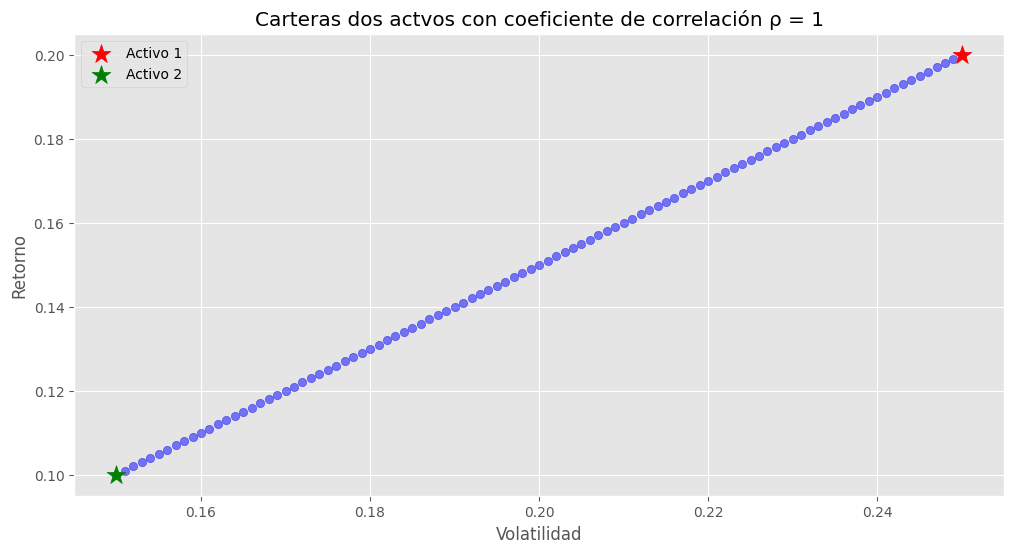

In [83]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(0, 1, 101) #generamos 101 puntos entre 0 y 1 que representan los pesos del activo 1

for i in x:
    reti = calc_ret_cartera(i, 1 - i, ret1, ret2) #calculamos el retorno de la cartera para cada peso
    stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr) #calculamos la volatilidad de la cartera para cada peso
    if i == p1:
        plt.scatter(stdi, reti, color='black', marker='*', s=200, label='Cartera') #marcamos el punto de la cartera
    else:
        plt.scatter(stdi, reti, color='blue', alpha=0.5) #marcamos el resto de puntos

plt.scatter(std1, ret1, color='red', marker='*', s=200, label='Activo 1') #marcamos el punto del activo 1
plt.scatter(std2, ret2, color='green', marker='*', s=200, label='Activo 2') #marcamos el punto del activo 2

plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.title('Carteras dos actvos con coeficiente de correlación \u03C1 = 1')
plt.legend()
plt.show()

### CASO 2:  &nbsp;&nbsp;&nbsp;&nbsp;   $\rho_{12} = -1$

* Si $\rho_{12} = -1$ se dice que los activos son **perfectamente pero negativamente** correlacionados.

    - Hay máximos beneficios de diversificación.

    - La rentabilidad de la cartera es igual (recordad que no depenede de las relaccciones entre activos).
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$
        

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        - $\sigma_P = w_1 \sigma_1 - w_2 \sigma_2\ \ \ \ \ \ $    OJO: el resultado debe ser positivo

In [72]:
# definimos el coeficiente de correlación
coef_corr_neg = -1

In [36]:
# calculamos la rentabilidad y volatilidad de la cartera con el nuevo coeficiente de correlación
print(f'El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, cof_corr):.2f} %')

El retorno de la cartera es:14.00 %
La volatilidad de la cartera es:1.00 %


Recordad que con $\rho_{12}=1$ nos dió:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 19$%

y con el $\rho_{12}=-1$ y nos ha dado:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 1$%

Gracias a la **diversificación**, obtenemos la misma rentabilidad pero **menor volatilidad**

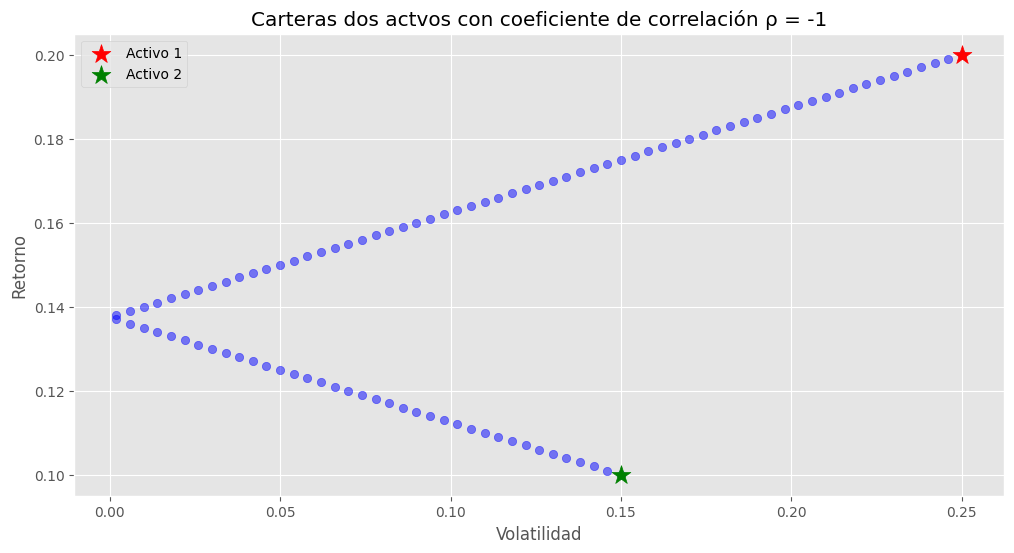

In [80]:
x = np.linspace(0, 1, 101) #generamos 101 puntos entre 0 y 1 que representan los pesos del activo 1

fig, ax = plt.subplots(figsize=(12, 6))

for i in x:
    reti = calc_ret_cartera(i, 1 - i, ret1, ret2) #calculamos el retorno de la cartera para cada peso
    stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr_neg) #calculamos la volatilidad de la cartera para cada peso
    if i == p1:
        plt.scatter(stdi, reti, color='black', marker='*', s=200, label='Cartera') #marcamos el punto de la cartera
    else:
        plt.scatter(stdi, reti, color='blue', alpha=0.5) #marcamos el resto de puntos

plt.scatter(std1, ret1, color='red', marker='*', s=200, label='Activo 1') #marcamos el punto del activo 1
plt.scatter(std2, ret2, color='green', marker='*', s=200, label='Activo 2') #marcamos el punto del activo 2

plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.title('Carteras dos actvos con coeficiente de correlación \u03C1 = -1')
plt.legend()
plt.show()

### CASO 3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    $-1\leq \rho_{12} \leq 1$

* Si $-1 \leq \rho_{12} \leq 1$ se dice que los activos tienen correlación **lineal no perfecta**.

    - Hay beneficios de diversificación, a mayor correlación negativa mayor beneficio.

    - La rentabilidad de la cartera es igual (recordad que no depenede de las relaccciones entre activos).
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$
        
    - La varianza de la cartera es igual a:
        - $\sigma²(\tilde R_p)= w_1²\sigma²(\tilde R_1)+w_2²\sigma²(\tilde R_2)+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2 $
        $$$$

    - La volatilidad de la cartera es igual a la raiz cuadrada de la varianza.
        - $\sigma(\tilde R_p)= \sqrt{w_1²\sigma²(\tilde R_1)+w_2²\sigma²(\tilde R_2)+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2} $

        

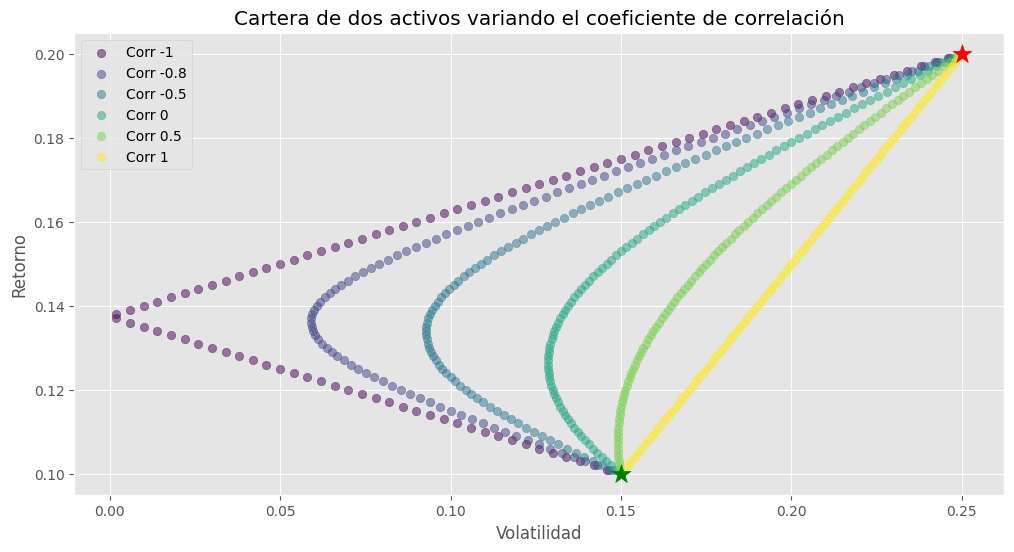

In [79]:
x = np.linspace(0, 1, 101)

coef_corr_lst = [-1, -0.8, -0.5, 0, 0.5, 1]

# Definir un mapa de colores basado en coef_corr_lst
cmap = plt.get_cmap('viridis', len(coef_corr_lst))

fig, ax = plt.subplots(figsize=(12, 6))

for i, coef_corr_i in enumerate(coef_corr_lst):
    color = cmap(i / len(coef_corr_lst))  # Obtener un color del mapa de colores para cada coef_corr_i

    for i in x:
        reti = calc_ret_cartera(i, 1 - i, ret1, ret2) #calculamos el retorno de la cartera para cada peso
        stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr_i) #calculamos la volatilidad de la cartera para cada peso

        if i != 1:
            plt.scatter(stdi, reti, color=color, alpha=0.5) #marcamos todos los puntos menos el último

        else:    
            plt.scatter(stdi, reti, color=color, alpha=0.5, label=f'Corr {coef_corr_i}') #marcamos el último punto con su etiqueta


plt.scatter(std1, ret1, color='red', marker='*', s=200) # marcamos el punto del activo 1
plt.scatter(std2, ret2, color='green', marker='*', s=200) # marcamos el punto del activo 2

plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.title('Cartera de dos activos variando el coeficiente de correlación')
plt.legend()
plt.show()

### CARTERA DE MÍNIMA VOLATILIDAD

VAmos a calcular la cartera de mínima varianza:

* Partimos de la fórmula de la varianza de la cartera:

    - $\sigma²(\tilde R_p)= w_1²\sigma²(\tilde R_1)+w_2²\sigma²(\tilde R_2)+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2 $
    $$$$

* Calculamos la derivada respecto de $w_1$ y sustituimos $w_2=1-w_1$ e igualamos a 0:

    - $\dfrac{\partial \sigma²(\tilde R_p)}{\partial w_1}= 2w_1\sigma²(\tilde R_1)+2(1-w_1)\sigma²(\tilde R_2)+ 2(1-w_1) \rho_{12} \sigma_1 \sigma_2 = 0$
    $$$$

* Despejamos $w_1$:

    - $w_1 = \dfrac{\sigma_2²-\rho_{12} \sigma_1 \sigma_2}{\sigma_1²+\sigma_2²-2 \rho_{12} \sigma_1 \sigma_2}$
    


  



En el caso de dos activos con correlación $\rho_{12} = -1$:

* $w_1 = \dfrac{\sigma_2²+\sigma_1 \sigma_2}{\sigma_1²+\sigma_2²+2 \sigma_1 \sigma_2} = \dfrac{\sigma_2(\sigma_1+\sigma_2)}{(\sigma_1+\sigma_2)²} = \dfrac{\sigma_2}{\sigma_1+\sigma_2}$

Si lo aplicamos al ejemplo de la cartera con dos activos que hemos estado usando:

In [75]:
p1 = std2/(std1+std2)
p2 = 1 - p1
print(f'El peso del activo 1 es: {100*p1:.2f}%')
print(f'El peso del activo 2 es: {100*p2:.2f}%')


El peso del activo 1 es: 37.50%
El peso del activo 2 es: 62.50%


In [76]:
# calculamos la rentabilidad y volatilidad de la cartera con los nuevos pesos
print(f'El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr_neg):.2f} %')

El retorno de la cartera es:13.75 %
La volatilidad de la cartera es:0.00 %


Recordad que con los pesos iniciales y $\rho_{12}=1$ nos dió:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 19$%

Y hemos visto que con $\rho_{12}=-1$ y la fórmula de la cartera de mínima varianza nos ha dado:

* $E(\tilde R_p) = 13.75$%

* $\sigma_p = 0$%

Gracias a la **diversificación**, obtenemos casi la misma rentabilidad pero **sin riesgo**

### DIVERSIFICACIÓN

Si generalizamos la varianza para una cartera de $N$ activos:

$$\sigma_p^2= \underset{DIVERSIFICABLE} {\underbrace{\sum_{i=1}^{N} w_i² \sigma _i²}} + \underset{NO DIVERSIFICABLE} {\underbrace{\sum_{i=1}^{N}\sum_{j=1}^{N}w_iw_j\sigma_{ij}}}$$

Podemos dividir la varianza en dos componentes:

* **No Sistemática**: $\sum_{i=1}^{N}w_i^2\sigma_{i}^2$ corresponde al riesgo de los activos individuales y es **diversificable**

* **Sistemática**: $\sum_{i=1}^{N}\sum_{j=1}^{N}w_iw_j\sigma_{ij}$ corresponde al riesgo de las relaciones entre los activos y **NO es diversificable**


<center>
    <img src="../imgs/tipos_de_riesgos.PNG"  alt="drawing" width="400">
</center>

Si hacemos una cartera en la que invertimos la misma cantidad en cada activo $\Rightarrow w_i = \dfrac{1}{N}$, la varianza de la cartera se puede escribir como:

$$\sigma_p^2= \dfrac{1}{N^2}\sum_{i=1}^{N} \sigma _i² + \dfrac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}\sigma_{ij}$$

Llamando:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Varianza media de los activos &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\bar{V} = \dfrac{1}{N}\sum_{i=1}^{N} \sigma _i²$ &nbsp;&nbsp;&nbsp;$\Rightarrow$ &nbsp;&nbsp;&nbsp; $\sum_{i=1}^{N} \sigma _i² = N \bar{V}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Covarianza media entre activos &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\bar{\sigma_{ij}} = \dfrac{1}{N(N-1)}\sum_{i=1}^{N}\sum_{j=1}^{N}\sigma_{ij}$ &nbsp;&nbsp;&nbsp; $\Rightarrow$ &nbsp;&nbsp;&nbsp;$ \sum_{i=1}^{N}\sum_{j=1}^{N}\sigma_{ij} = N(N-1)\bar{\sigma_{ij}}$

Sustituyendo en la ecuación de la varianza de una cartera equiponderada:

$$\sigma_p^2= \dfrac{1}{N^2}N \bar{V} + \dfrac{1}{N^2}N(N-1)\bar{\sigma_{ij}} = \dfrac{1}{N}\bar{V} + \dfrac{N-1}{N}\bar{\sigma_{ij}} $$

$$\sigma_p^2= \dfrac{\bar{V}}{N} + \bar{\sigma_{ij}} - \dfrac{\bar{\sigma_{ij}}}{N} $$

Si el número de activos $N$ tiende a infinito:

$$\lim_{N \to \infty} \sigma_p^2= \bar{\sigma_{ij}} $$